In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy.linalg import inv

In [2]:
#get flights dataset
flights_data = pd.read_csv('dataset/FlightDelays.csv')

In [3]:
flights_data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime


In [4]:
flights_data=flights_data.rename(columns={"Flight_Status": "FLIGHT_STATUS"})

In [5]:
# Check if there are any null values in the dataframe
flights_data.isnull().any()
# There are no null values in the data as shown below

CRS_DEP_TIME     False
CARRIER          False
DEP_TIME         False
DEST             False
DISTANCE         False
FL_DATE          False
FL_NUM           False
ORIGIN           False
Weather          False
DAY_WEEK         False
DAY_OF_MONTH     False
TAIL_NUM         False
FLIGHT_STATUS    False
dtype: bool

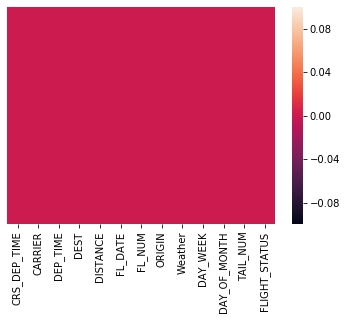

In [6]:
#Check for null values in the dataset
sns.heatmap(flights_data.isnull(), yticklabels=False)
plt.show()


In [7]:
# Cross check the data types of all the columns before modeling
print(flights_data.dtypes)

CRS_DEP_TIME      int64
CARRIER          object
DEP_TIME          int64
DEST             object
DISTANCE          int64
FL_DATE          object
FL_NUM            int64
ORIGIN           object
Weather           int64
DAY_WEEK          int64
DAY_OF_MONTH      int64
TAIL_NUM         object
FLIGHT_STATUS    object
dtype: object


In [8]:
flights_data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FLIGHT_STATUS
0,1455,OH,1455,JFK,184,01-01-2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01-01-2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01-01-2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01-01-2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01-01-2004,7792,IAD,0,4,1,N698BR,ontime


In [9]:
len(flights_data)

2201

In [10]:
flights_data.columns
len(flights_data.columns)

13

In [11]:
#converting the object type(String type) to categorical data
#substitute to adding dummy variables

from collections import defaultdict
d = defaultdict(LabelEncoder)

#selecting cols that need to be transformed
df = pd.DataFrame(flights_data, columns = ['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM','FLIGHT_STATUS'])

# Encoding the variable
fit = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
flights_cat=pd.DataFrame(df.apply(lambda x: d[x.name].transform(x)))

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(flights_cat[['CARRIER', 'DEST', 'FL_DATE', 'ORIGIN','TAIL_NUM']]).toarray())
flights_df =enc_df
# flights_df




#add the rest of the cols to the dataframe
flights_df['CRS_DEP_TIME']=flights_data['CRS_DEP_TIME']
flights_df['DEP_TIME']=flights_data['DEP_TIME']
flights_df['DISTANCE']=flights_data['DISTANCE']
flights_df['FL_NUM']=flights_data['FL_NUM']
flights_df['Weather']=flights_data['Weather']
flights_df['DAY_WEEK']=flights_data['DAY_WEEK']
flights_df['DAY_OF_MONTH']=flights_data['DAY_OF_MONTH']
flights_df['FLIGHT_STATUS']=flights_cat['FLIGHT_STATUS']

#print top 5 values of the dataset
# flights_df.head()
flights_df.head()


,0,1,2,3,4,5,6,7,8,9,...,592,593,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH,FLIGHT_STATUS
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1455,1455,184,5935,0,4,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1640,1640,213,6155,0,4,1,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1245,1245,229,7208,0,4,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1715,1709,229,7215,0,4,1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1039,1035,229,7792,0,4,1,1


In [12]:
#select dependent and independent variables

X = flights_df.drop({'FLIGHT_STATUS'}, axis=1)
y = flights_df['FLIGHT_STATUS']

## Logistic Regression


In [13]:
#split dataset into train and test data by 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [14]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # print(linear_model)

            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw.astype(float)
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        x=x.astype(float)
        return 1 / (1 + np.exp(-x))
    
    

In [15]:
#call Logistic Regression class
regressor = LogisticRegression(learning_rate=0.001, n_iters=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [17]:
#find accuracy of the model
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [18]:
#accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


In [19]:
#logistic Regression from Skit learn (uncomment for scikit )
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(max_iter=1000,random_state = 12)
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# y_pred

# Model Report

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.81


In [21]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:", tn, " ", fp, " ", fn, " ", tp)

Confusion Matrix: 11   171   0   699


In [22]:
# Sensitivity
sensitivity=tp/(fn+tp)
print('Sensitivity: {:.2f}'.format(sensitivity))

Sensitivity: 1.00


In [23]:
# Specificity
specificity=tn/(tn+fp)
print('Specificity: {:.2f}'.format(specificity))

Specificity: 0.06


In [24]:
# Precision
precision=tp/(tp+fp)
print('precision: {:.2f}'.format(precision))

precision: 0.80


In [25]:
# Accuracy and misclassfication rate
misclassification=1-(accuracy_score(y_test, y_pred))
print('misclassification: {:.2f}'.format(misclassification))

misclassification: 0.19


In [26]:
from sklearn.metrics import classification_report
print('Classification report:',classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      0.06      0.11       182
           1       0.80      1.00      0.89       699

    accuracy                           0.81       881
   macro avg       0.90      0.53      0.50       881
weighted avg       0.84      0.81      0.73       881

